# Практическая работа 6 (Тест)
## Тема: Введение в статистический анализ данных

### Настройка окружения

In [ ]:
import pandas as pd

## Часть 1

Для успешного прохождения теста вам потребуется воспользоваться [данными](./StarWars.csv) по серии фильмов «Звездные войны», самостоятельно загрузив их в Python.

*Описание данных*

- **respondentID** — идентификационный номер респондента;
- **seen** — ответ на вопрос, видел ли респондент хотя бы один фильм из серии «Звездных войн» (да/нет);
- **fan** — ответ на вопрос, считает ли респондент себя фанатом серии фильмов (да/нет);
- **gender** — пол респондента (М/Ж);
- **age_group** — возрастная группа, к которой принадлежит респондент (18-29, 30-44, 45-60, > 60);
- **income** — доход респондента в долларах США (0 - 24.999, 25.000 - 49.999, 50.000 - 99.999, 100.000 - 149.999, 150.000+);
- **loc** — регион проживания респондента (в США);
- **yoda** — отношение респондента к персонажу серии (Йоде);
- **princess_leia_organa** — отношение респондента к персонажу серии (принцессе Лее Органе).

In [65]:
survey = pd.read_csv("StarWars.csv", sep=";")
survey.head(1)

,respondentID,seen,fan,gender,age_group,income,loc,yoda,princess_leia_organa
0,3292879998,да,да,М,18-29,NaN,Южно-Атлантический,очень нравится,очень нравится


### Вопрос 1
К какой шкале относится переменная **gender**?

*Ответ*: Номинальная

### Вопрос 2
Сколько респондентов не ответили на вопрос о своем регионе проживания?

In [66]:
survey["loc"].isnull().sum()

np.int64(143)

### Вопрос 3
Данные каких столбцов нельзя упорядочить?

*Ответ*: **seen**, **fan**, **gender**, **loc**, **yoda**, **princess_leia_organa**

### Вопрос 4
Укажите, верно ли следующее утверждение: все женщины старше 60 лет, входящие в категорию с наивысшим доходом и являющиеся фанатами серии фильмов, проживают в одном регионе.

In [67]:
old_rich_women_fans = survey[(
    (survey.fan == "да")
    & (survey.gender == "Ж")
    & (survey["age_group"] == "> 60")
    & (survey.income == "150.000+")
)]

old_rich_women_fans["loc"].nunique() == 1

False

### Вопрос 5
Мужчины 18-29 лет, которые не являются фанатами серии, чаще всего проживают в ... регионе.

In [68]:
middle_age_men = survey[
    ((survey.fan == "нет") & (survey.gender == "М") & (survey["age_group"] == "18-29"))
]

middle_age_men["loc"].value_counts().idxmax()

'Тихоокеанский'

### Вопрос 6
Какой регион проживания реже всего встречается в данных?

In [69]:
survey["loc"].value_counts().idxmin()

'Юго-Восточный центральный'

### Вопрос 7
Скольким респондентам одновременно очень нравятся Йода и принцесса Лея Органа?

In [70]:
yoda_and_leia_fans = survey[
    (survey.yoda == "очень нравится")
    & (survey["princess_leia_organa"] == "очень нравится")
]

len(yoda_and_leia_fans)

462

### Вопрос 8
Скольким респондентам из Новой Англии очень нравится принцесса Лея Органа?

In [71]:
uk_leia_fans = survey[
    (survey["loc"] == "Новая Англия")
    & (survey["princess_leia_organa"] == "очень нравится")
]

len(uk_leia_fans)

39

### Вопрос 9
Посмотрите на мужчин, проживающих в горном районе. В ответ запишите ID респондента, входящего в категорию с наивысшим доходом при заданных условиях.

In [72]:
mountain_men = survey[(survey["loc"] == "Горный") & (survey.gender == "М")]

mountain_men[mountain_men.income == "150.000+"].iloc[0].respondentID

np.int64(3291077381)

### Вопрос 10
Верно ли следующее утверждение: фанатов серии фильмов в возрастной категории 30-44 меньше, чем не-фанатов в возрастной категории 18-29.

В ответе укажите абсолютное значение разницы между числом фанатов и не-фанатов при заданных условиях. 

In [73]:
middle_age_fans = survey[(survey.fan == "да") & (survey["age_group"] == "30-44")]
young_age_not_fans = survey[(survey.fan == "нет") & (survey["age_group"] == "18-29")]

abs(len(middle_age_fans) - len(young_age_not_fans))

94

### Вопрос 11
Сколько процентов (от общего числа респондентов) являются фанатами серии фильмов, проживают в Новой Англии и имеют доход 0 - 24.999 долларов?

В ответ запишите число (процент от 0 до 100), округлите до целого.

In [74]:
uk_poor_fans = survey[
    (survey["loc"] == "Новая Англия")
    & (survey.fan == "да")
    & (survey.income == "0 - 24.999")
]

round((len(uk_poor_fans) / len(survey)) * 100)

1

## Часть 2

Для успешного прохождения теста вам потребуется воспользоваться [данными](./MarvelComicCharacters.csv) персонажей вселенной Marvel, самостоятельно загрузив их в Python.

*Описание данных*
- **name** — оригинальное имя персонажа вселенной Marvel
- **align** — принадлежность персонажа к доброй/злой/нейтральной стороне
- **eye** — описание глаз персонажа
- **hair** — описание волос персонажа
- **sex** — пол персонажа
- **appearances** — количество появлений персонажа
- **first_appearance** — год первого появления персонажа

In [75]:
characters = pd.read_csv("MarvelComicCharacters.csv", sep=";")
characters.head(1)

,name,align,eye,hair,sex,appearances,first_appearance
0,Spider-Man (Peter Parker),Добрый персонаж,Карие глаза,Каштановые волосы,Мужской персонаж,4043.0,1962.0


### Вопрос 1
Что не может представлять собой генеральную совокупность?

*Варианты ответа*

1. Мужчины в возрастной группе 25-30 лет
2. Нет верного ответа
3. Россияне
4. Школьники Красноярска

*Ответ*: Нет верного ответа

### Вопрос 2
Укажите, верно ли следующее утверждение: переменную **name** можно изобразить на интерпретируемом графике.

*Ответ*: Неверно

### Вопрос 3
Какое значение находится в колонке **appearances** для доброго персонажа с пурпурными глазами?

In [82]:
kind_with_purple_eyes = characters[
    (characters["align"] == "Добрый персонаж")
    & (characters.eye == "Пурпурные глаза")
]

kind_with_purple_eyes["appearances"].iloc[0]

np.float64(21.0)

### Вопрос 4
Заполните пропущенное значение во фрагменте частотной таблицы по переменной **eye**.

| Серые глаза | Карие глаза | Розовые глаза |
|------------|------------|--------------|
| 95         | ...      | 21           |

In [86]:
characters["eye"].value_counts()["Карие глаза"]

np.int64(76)

### Вопрос 5
Постройте частотную таблицу по переменной **hair** для персонажей мужского пола с карими глазами. У скольких из них черные волосы?

In [89]:
men_with_brown_eyes = characters[
    (characters.sex == "Мужской персонаж")
    & (characters.eye == "Карие глаза")
]

men_with_brown_eyes.hair.value_counts()["Черные волосы"]

np.int64(10)

### Вопрос 6
Какой тип графика наиболее удобен для описания распределения переменной **appearances**?

*Ответ*: Гистограмма

### Вопрос 7
Меньше всего персонажей в первый раз появилось в ... году.

In [91]:
characters["first_appearance"].value_counts().idxmin()

np.float64(1958.0)

### Вопрос 8
Сколько процентов (от общего числа персонажей) составляют мужские персонажи, которые появлялись больше 100 раз?

В ответ запишите число (процент от 0 до 100), округлите до целого.

In [95]:
famous_men = characters[
    (characters.sex == "Мужской персонаж") & (characters.appearances > 100)
]

round((len(famous_men) / len(characters)) * 100)

2

### Вопрос 9
Были выбраны 5 самых часто встречающихся цветов глаз персонажей. Постройте столбчатую диаграмму по этим данным.

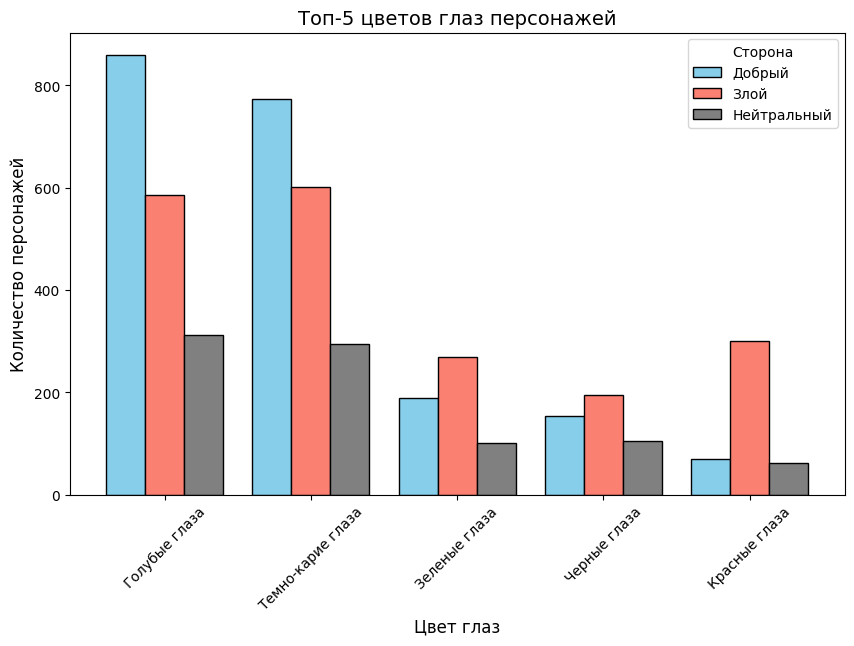

In [108]:
import matplotlib.pyplot as plt

frequent_eyes = characters.eye.value_counts().head(5)

eye_align_counts = characters.groupby(["eye", "align"]).size().unstack(fill_value=0)

top_eyes = frequent_eyes.index
eye_align_counts = eye_align_counts.loc[top_eyes]

ax = eye_align_counts.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.8,
    color=["skyblue", "salmon", "gray"],
    edgecolor="black",
)

plt.title("Топ-5 цветов глаз персонажей", fontsize=14)
plt.xlabel("Цвет глаз", fontsize=12)
plt.ylabel("Количество персонажей", fontsize=12)

plt.xticks(rotation=45)

plt.legend(title="Сторона", labels=["Добрый", "Злой", "Нейтральный"])

plt.show()